# Pakage & Data

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Data
from sklearn.datasets import load_wine
wine = load_wine()
wine_df = pd.DataFrame(data = wine.data, columns = wine.feature_names) # 데이터 프레임 변환
wine_df_y = wine.target

In [3]:
wine_df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [4]:
wine_df['target'] = wine_df_y

In [5]:
np.unique(wine_df_y,
          return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

In [6]:
# columns
wine_df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

# EDA

### 결측값

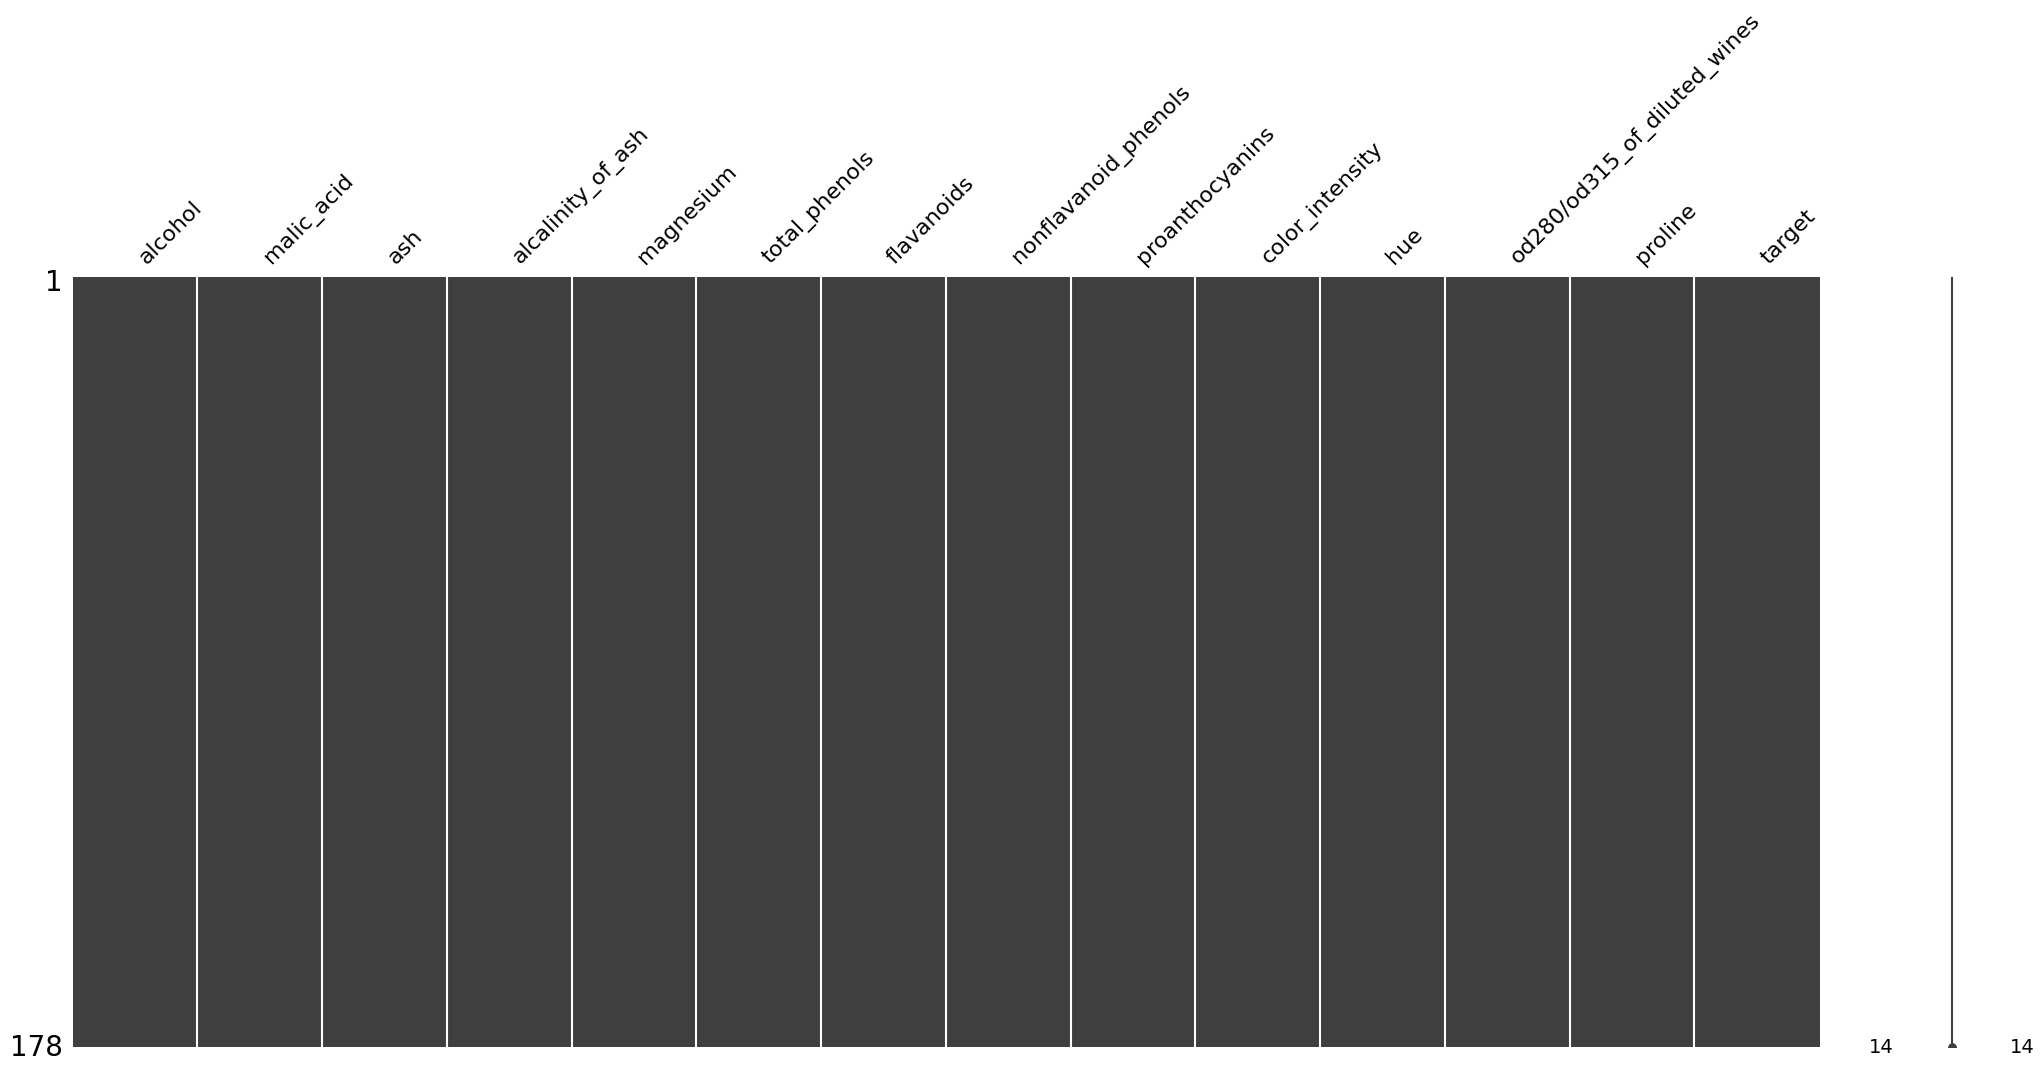

In [7]:
import missingno as miss
miss.matrix(wine_df);

In [8]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [9]:
wine_df.shape

(178, 14)

### 분포 확인

In [10]:
sns.pairplot(wine_df, hue = 'target', palette = 'deep')

Output hidden; open in https://colab.research.google.com to view.

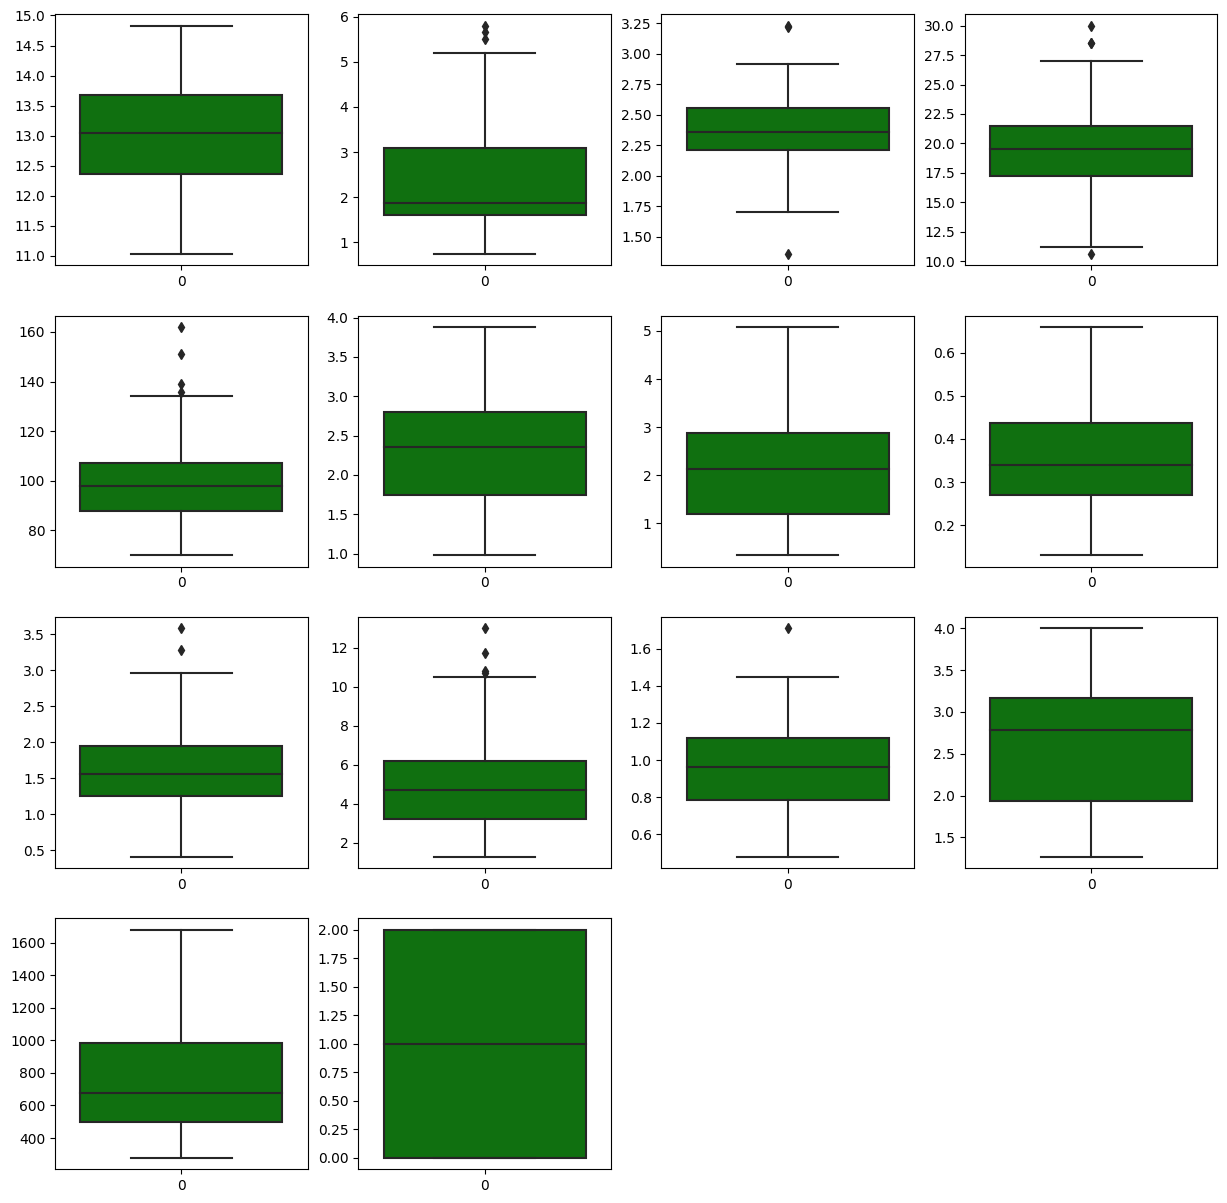

In [11]:
plt.figure(figsize=(15, 15))

for idx, col in enumerate(list(wine_df)):
    plt.subplot(4, 4, idx+1)
    sns.boxplot(wine_df[col], color = 'g')

In [12]:
wine_df['malic_acid'].sort_values(ascending = False).head(3)

123    5.80
173    5.65
137    5.51
Name: malic_acid, dtype: float64

In [13]:
wine_df.loc[[123, 173, 137]]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380.0,1
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515.0,2


### 상관계수

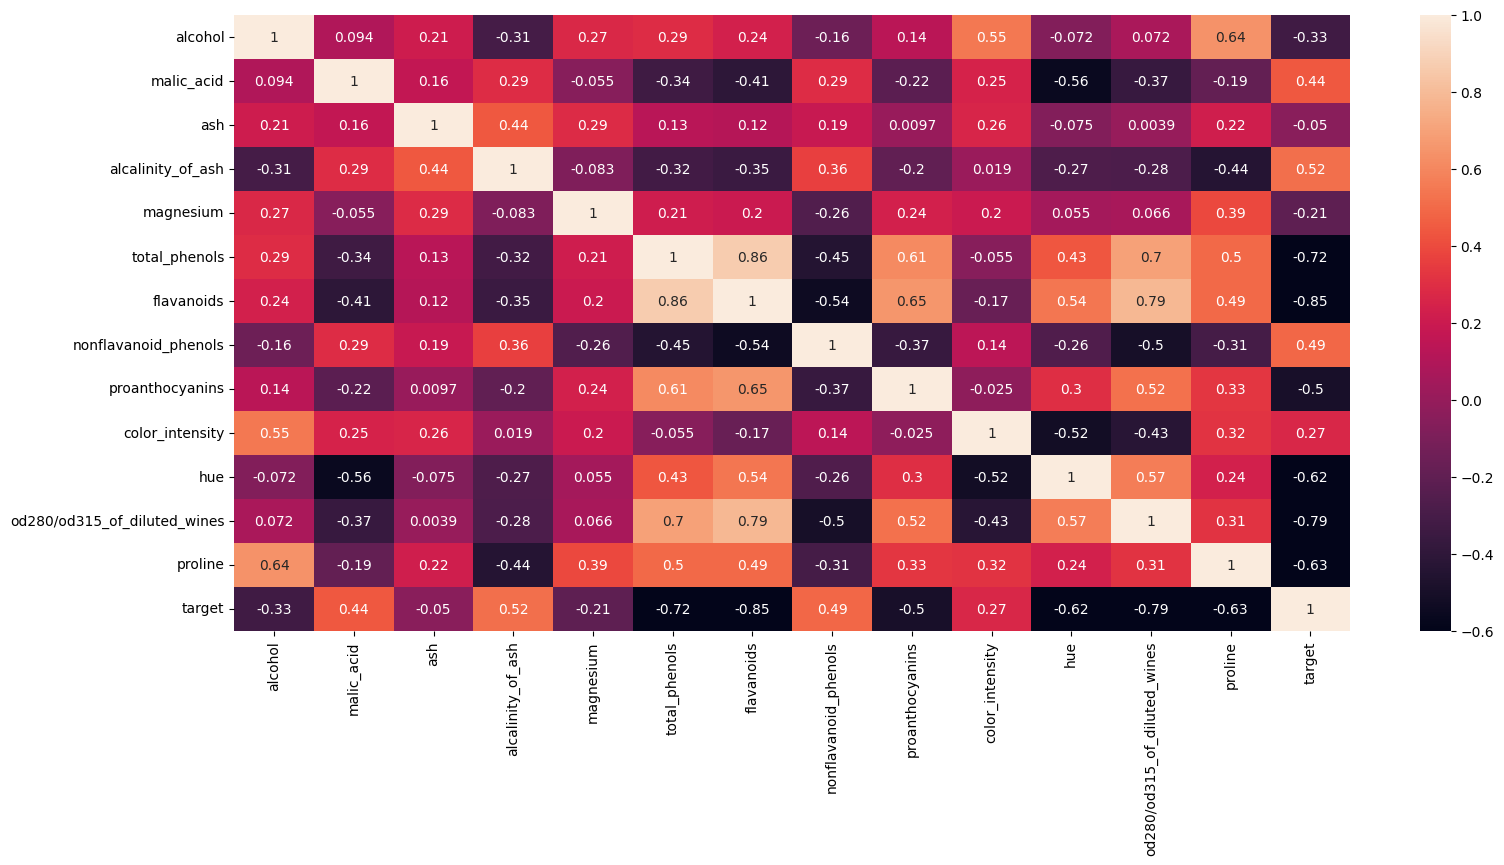

In [14]:
plt.figure(figsize=(18,8))
corr= wine_df.corr()
sns.heatmap(corr, annot=True, square=False, vmin=-.6, vmax=1.0);

## Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from IPython.display import Image
import pydotplus

In [16]:
X = wine_df.drop('target', axis = 1)
y = wine_df['target']

dt_clf = DecisionTreeClassifier(random_state= 2023).fit(X,y)

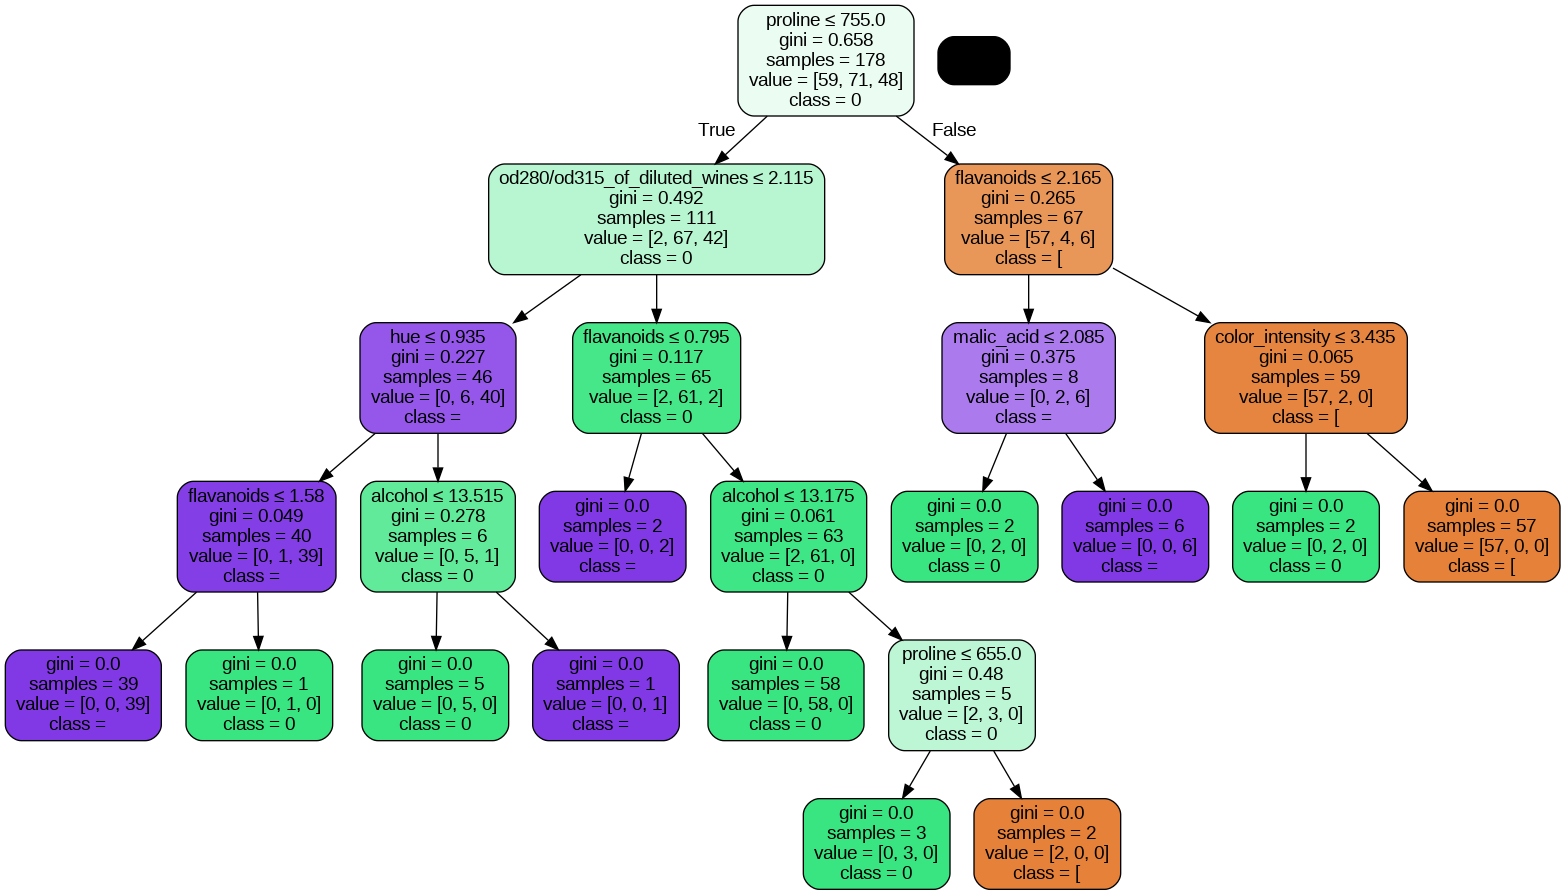

In [17]:
dot_data = export_graphviz(dt_clf, out_file=None, feature_names=X.columns,
                          class_names= str(y.unique()), filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

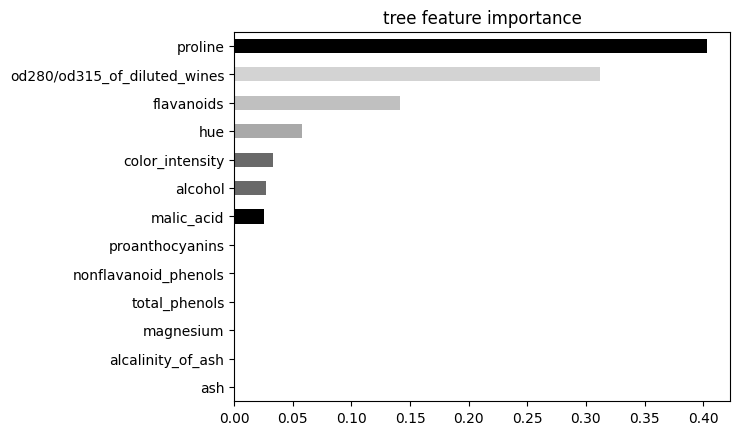

In [18]:
# 변수 중요도
colors = ['black','dimgray','dimgrey','darkgray','silver','lightgrey']
clf_importance = pd.Series(dt_clf.feature_importances_, index = wine["feature_names"]).sort_values()
clf_importance.plot(kind = "barh", title = "tree feature importance", color = colors)
plt.show()

### 데이터 추출

In [19]:
# data seting
X = X[['proline', 'od280/od315_of_diluted_wines', 'flavanoids', 'hue', 'color_intensity', 'alcohol', 'malic_acid']]
dt_new = X
dt_new['target'] = y

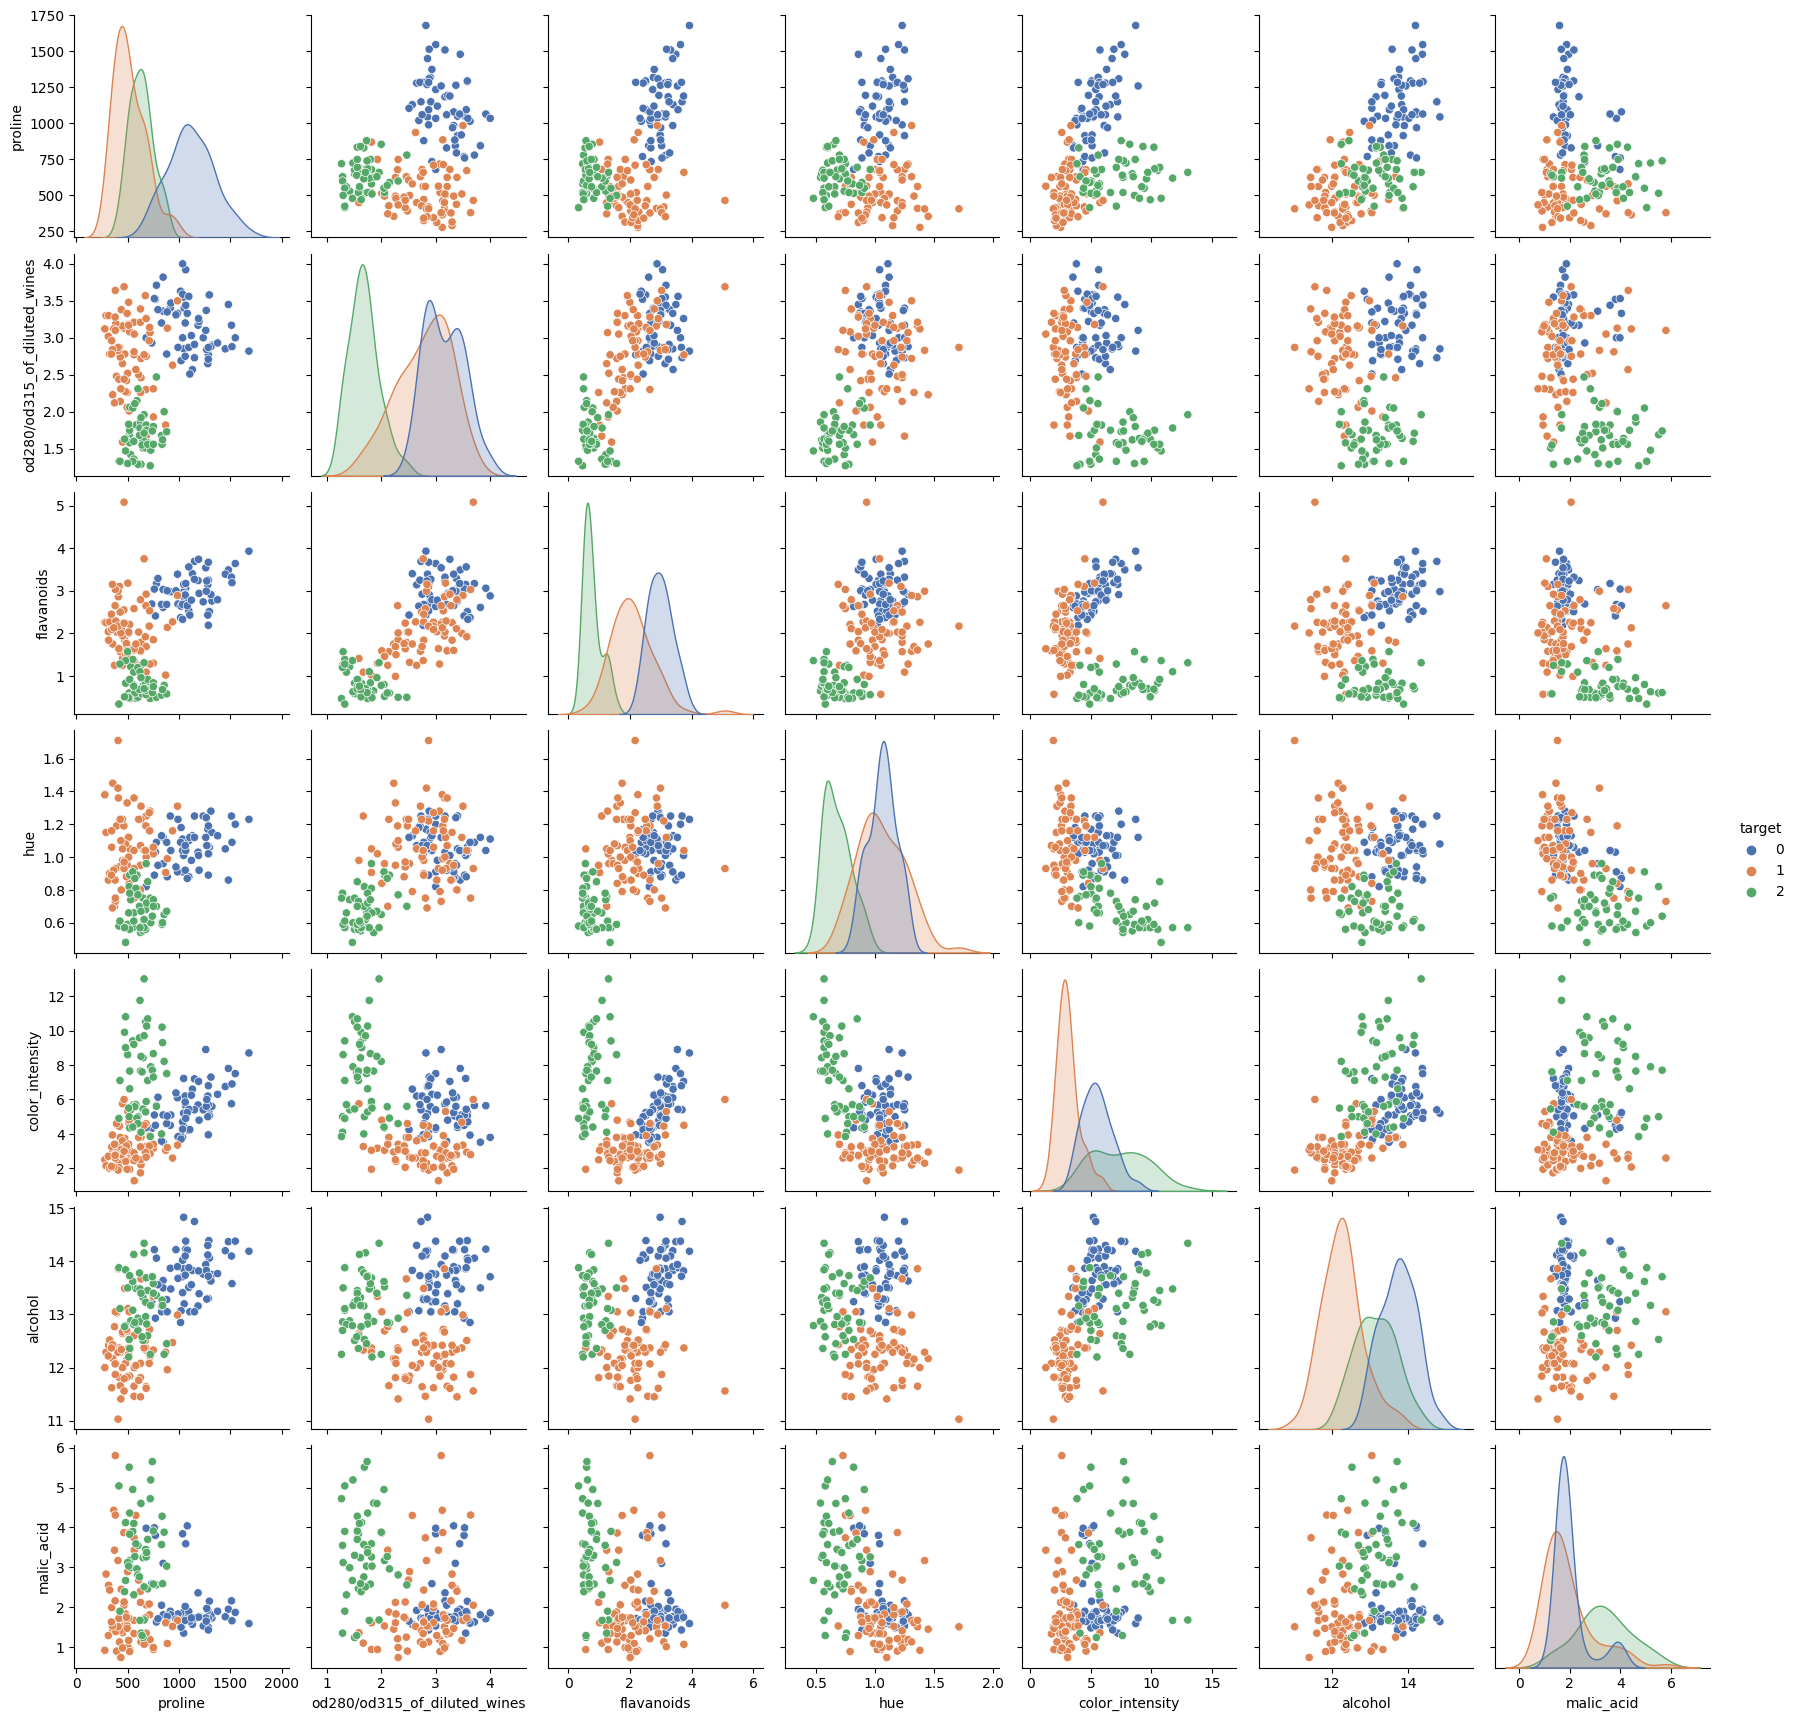

In [20]:
# 분포확인
sns.pairplot(dt_new, hue = 'target', palette = 'deep')

### 추출된 피처 확인

In [21]:
X.head(5)

,proline,od280/od315_of_diluted_wines,flavanoids,hue,color_intensity,alcohol,malic_acid,target
0,1065.0,3.92,3.06,1.04,5.64,14.23,1.71,0
1,1050.0,3.40,2.76,1.05,4.38,13.20,1.78,0
2,1185.0,3.17,3.24,1.03,5.68,13.16,2.36,0
3,1480.0,3.45,3.49,0.86,7.80,14.37,1.95,0
4,735.0,2.93,2.69,1.04,4.32,13.24,2.59,0


In [22]:
X.columns

Index(['proline', 'od280/od315_of_diluted_wines', 'flavanoids', 'hue',
       'color_intensity', 'alcohol', 'malic_acid', 'target'],
      dtype='object')

In [23]:
X['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

# 모델링

In [24]:
# 변수 제거
X = X.iloc[:,:-1]

In [25]:
X.head(3)

,proline,od280/od315_of_diluted_wines,flavanoids,hue,color_intensity,alcohol,malic_acid
0,1065.0,3.92,3.06,1.04,5.64,14.23,1.71
1,1050.0,3.40,2.76,1.05,4.38,13.20,1.78
2,1185.0,3.17,3.24,1.03,5.68,13.16,2.36


In [26]:
y.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [27]:
# Data Split
from sklearn.model_selection import train_test_split

# 평가
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2023)

In [28]:
# 분리 됬는지 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(124, 7) (124,)
(54, 7) (54,)


## Decision Tree

In [29]:
# Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=2023)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2023)

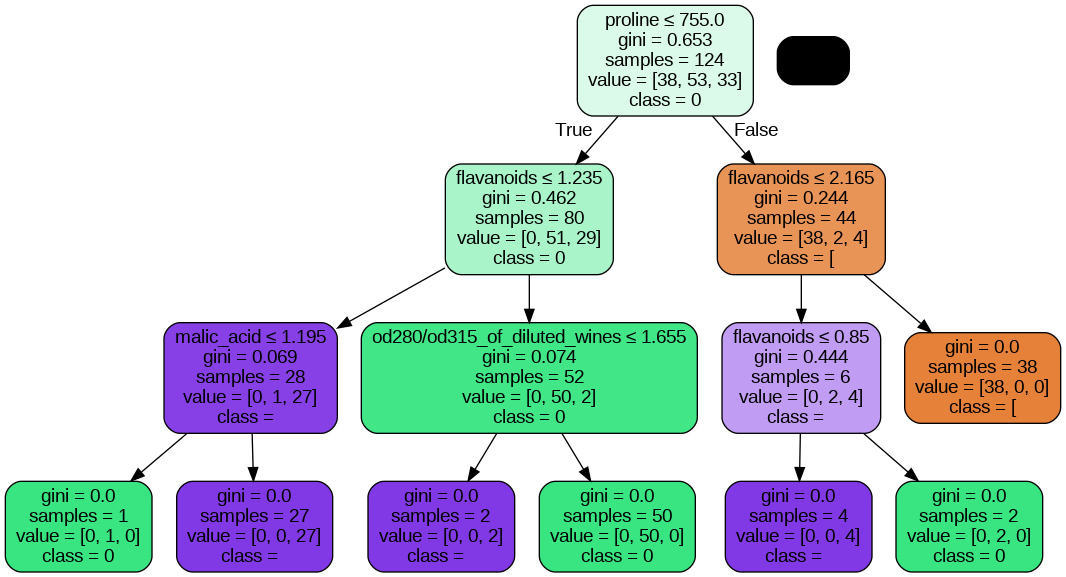

In [30]:
dot_data = export_graphviz(dt_clf, out_file=None, feature_names = X.columns,
                          class_names= str(y.unique()), filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [31]:
pred = dt_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.82      0.78      0.80        18
           2       0.88      0.93      0.90        15

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



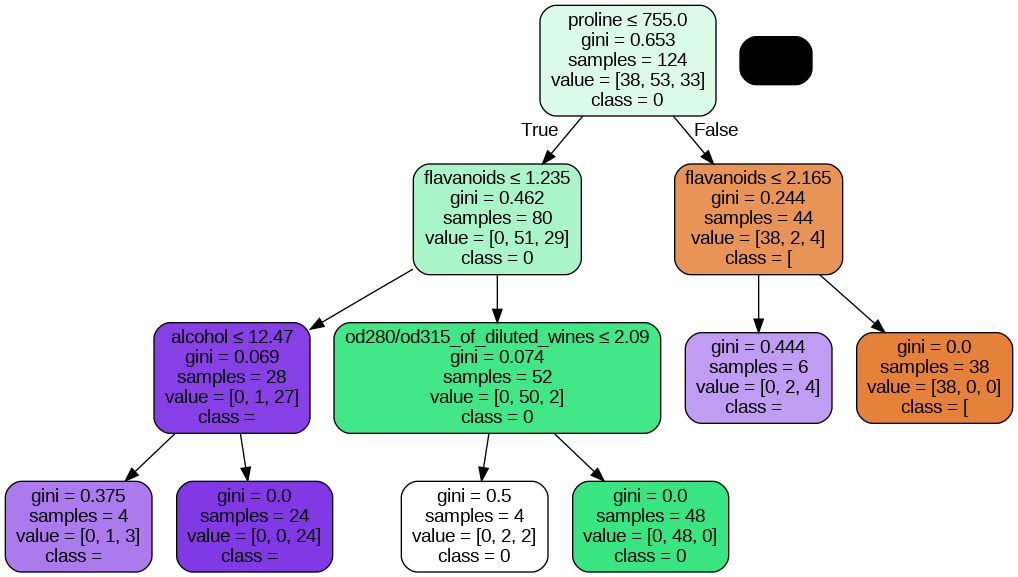

In [32]:
# Decision Tree model 튜닝
dt_clf = DecisionTreeClassifier(random_state=2023, min_samples_leaf = 4)
dt_clf.fit(X_train, y_train)

# 시각화
dot_data = export_graphviz(dt_clf, out_file=None, feature_names = X.columns,
                          class_names= str(y.unique()), filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [33]:
pred = dt_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.70      0.78      0.74        18
           2       0.85      0.73      0.79        15

    accuracy                           0.81        54
   macro avg       0.82      0.81      0.81        54
weighted avg       0.82      0.81      0.82        54



## SVM

In [45]:
from sklearn.preprocessing import StandardScaler

# StandardScaler를 사용하여 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
from sklearn.svm import SVC

dt_svm = SVC(kernel='linear', C=1)
dt_svm.fit(X_train_scaled, y_train)

# 모델 예측 및 평가
y_pred = dt_svm.predict(X_test_scaled)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.89      0.94        18
           2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



In [49]:
from sklearn.model_selection import GridSearchCV

svm_model = SVC()

# Grid Search를 위한 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator= svm_model, param_grid=param_grid, cv=5)

# Grid Search 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터와 점수 출력
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.99


In [51]:
best_params = grid_search.best_params_
grid_search_best = SVC(**best_params)

# 모델 학습
grid_search_best.fit(X_train_scaled, y_train)

# 모델 예측 및 평가
y_pred = grid_search_best.predict(X_test_scaled)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



SVM 모델 사용